In [2]:
import pandas as pd

#Load the ratings dataset from the "rating.csv" file
ratings = pd.read_csv("rating.csv")

#Load the movies dataset from the "movie.csv" file
movies = pd.read_csv("movie.csv")

#Display the first few rows of the ratings dataset
print("\nFirst rows of rating.csv:")
print(ratings.head())

#Display the first few rows of the movies dataset
print("\nFirst rows of movie.csv:")
print(movies.head())

#Show information about the ratings dataset
print("\nInformation about the rating.csv dataset:")
print(ratings.info())

#Show information about the movies dataset
print("\nInformation about the movie.csv dataset:")
print(movies.info())


First rows of rating.csv:
   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40

First rows of movie.csv:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Information about the rating.csv dataset:
<class 'pandas.core.f

In [3]:
#Check for missing values in the ratings dataset
print("\nNull values in rating.csv:")
print(ratings.isnull().sum())

#Check for missing values in the movies dataset
print("\nNull values in movie.csv:")
print(movies.isnull().sum())

#Check for duplicate rows in the ratings dataset
print("\nDuplicate rows in rating.csv:", ratings.duplicated().sum())

#Check for duplicate rows in the movies dataset
print("Duplicate rows in movie.csv:", movies.duplicated().sum())


Null values in rating.csv:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Null values in movie.csv:
movieId    0
title      0
genres     0
dtype: int64

Duplicate rows in rating.csv: 0
Duplicate rows in movie.csv: 0


In [4]:
#Merge the ratings and movies datasets on the 'movieId' column using an inner join
ratings_with_movies = pd.merge(ratings, movies, on='movieId', how='inner')

#Display the first rows of the merged dataset for an overview
print("\nFirst rows of the merged dataset:")
print(ratings_with_movies.head())

#Print the dimensions (rows and columns) of the merged dataset
print("\nDimensions of the merged dataset:", ratings_with_movies.shape)


First rows of the merged dataset:
   userId  movieId  rating            timestamp  \
0       1        2     3.5  2005-04-02 23:53:47   
1       1       29     3.5  2005-04-02 23:31:16   
2       1       32     3.5  2005-04-02 23:33:39   
3       1       47     3.5  2005-04-02 23:32:07   
4       1       50     3.5  2005-04-02 23:29:40   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cité des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                   genres  
0              Adventure|Children|Fantasy  
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi  
2                 Mystery|Sci-Fi|Thriller  
3                        Mystery|Thriller  
4                  Crime|Mystery|Thriller  

Dimensions of the merged dataset: (20000263, 6)


In [5]:
#Calculate the number of movies watched by each user
movies_per_user = ratings_with_movies.groupby('userId')['movieId'].count()
print("\nAverage number of movies watched per user:", movies_per_user.mean())

#Calculate the number of ratings received by each movie
ratings_per_movie = ratings_with_movies.groupby('movieId')['userId'].count()
print("Average number of ratings received per movie:", ratings_per_movie.mean())

#Split the 'genres' column into individual genres and count the most popular ones
genres_exploded = ratings_with_movies['genres'].str.split('|').explode()
print("\nMost popular genres:")
print(genres_exploded.value_counts().head(10))


Average number of movies watched per user: 144.4135299257002
Average number of ratings received per movie: 747.8411232425965

Most popular genres:
genres
Drama        8857853
Comedy       7502234
Action       5614208
Thriller     5313506
Adventure    4380351
Romance      3802002
Crime        3298335
Sci-Fi       3150141
Fantasy      2111403
Children     1669249
Name: count, dtype: int64


In [6]:
#Calculate the correlation between the popularity of movies (number of ratings) and their average rating
correlation = ratings_per_movie.corr(ratings_with_movies.groupby('movieId')['rating'].mean())
print("Correlation between popularity and average rating:", correlation)

Correlation between popularity and average rating: 0.14317987561648113


The calculated correlation, 0.1432, indicates a weak positive relationship between a movie’s popularity (number of ratings received) and its average rating. This means that more popular movies tend to have slightly higher average ratings, but the association is neither strong nor significant.

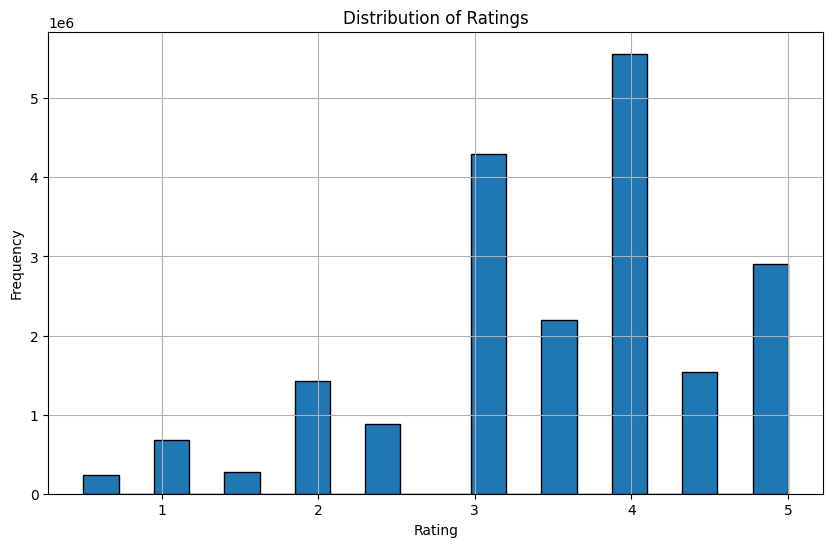

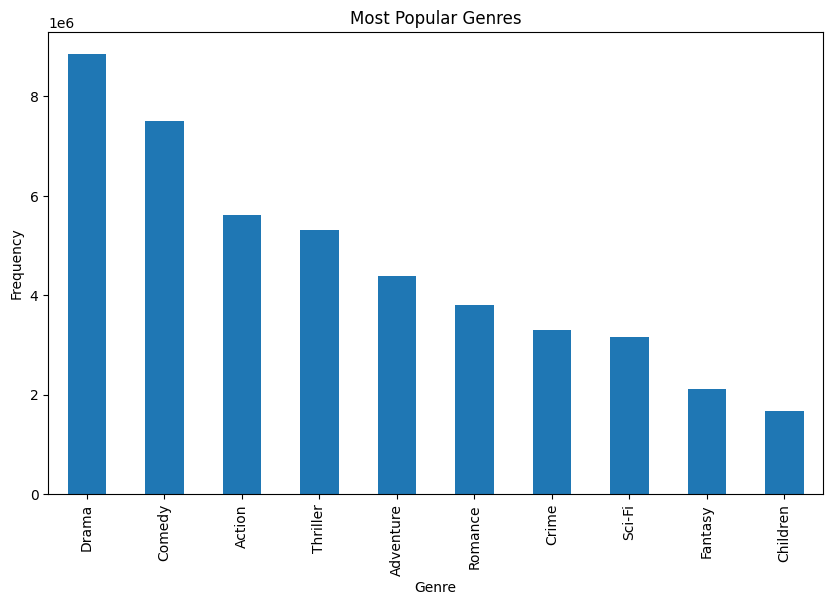

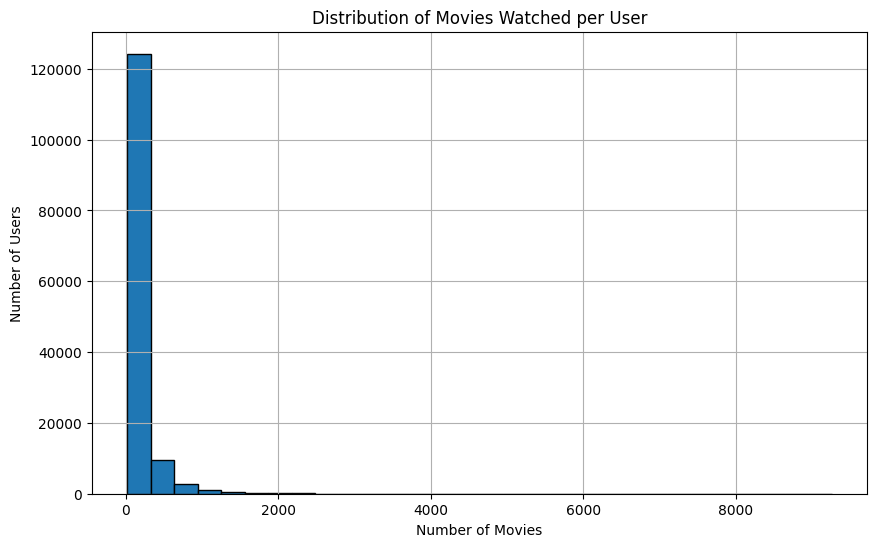

In [10]:
import matplotlib.pyplot as plt

#Plotting the distribution of ratings
plt.figure(figsize=(10, 6))  
ratings_with_movies['rating'].hist(bins=20, edgecolor='black')  #Create a histogram for the 'rating' column
plt.title("Distribution of Ratings")  
plt.xlabel("Rating")  
plt.ylabel("Frequency")  
plt.show()  

#Plotting the most popular genres
plt.figure(figsize=(10, 6))  
genres_exploded.value_counts().head(10).plot(kind='bar')  #Create a bar plot for the top 10 most frequent genres
plt.title("Most Popular Genres")  
plt.xlabel("Genre")  
plt.ylabel("Frequency")  
plt.show()  

#Plotting the distribution of the number of movies watched per user
plt.figure(figsize=(10, 6))  
movies_per_user.hist(bins=30, edgecolor='black')  #Create a histogram for the number of movies watched per user
plt.title("Distribution of Movies Watched per User")  
plt.xlabel("Number of Movies")  
plt.ylabel("Number of Users")  
plt.show() 


Average Rating per Genre:
genres
Film-Noir             3.965381
War                   3.809531
Documentary           3.739718
Crime                 3.674528
Drama                 3.674296
Mystery               3.663509
IMAX                  3.655946
Animation             3.617494
Western               3.570498
Musical               3.558091
Romance               3.541803
Thriller              3.507111
Fantasy               3.505945
Adventure             3.501893
Action                3.443864
Sci-Fi                3.436773
Comedy                3.426011
Children              3.408114
Horror                3.277224
(no genres listed)    3.006925
Name: rating, dtype: float64


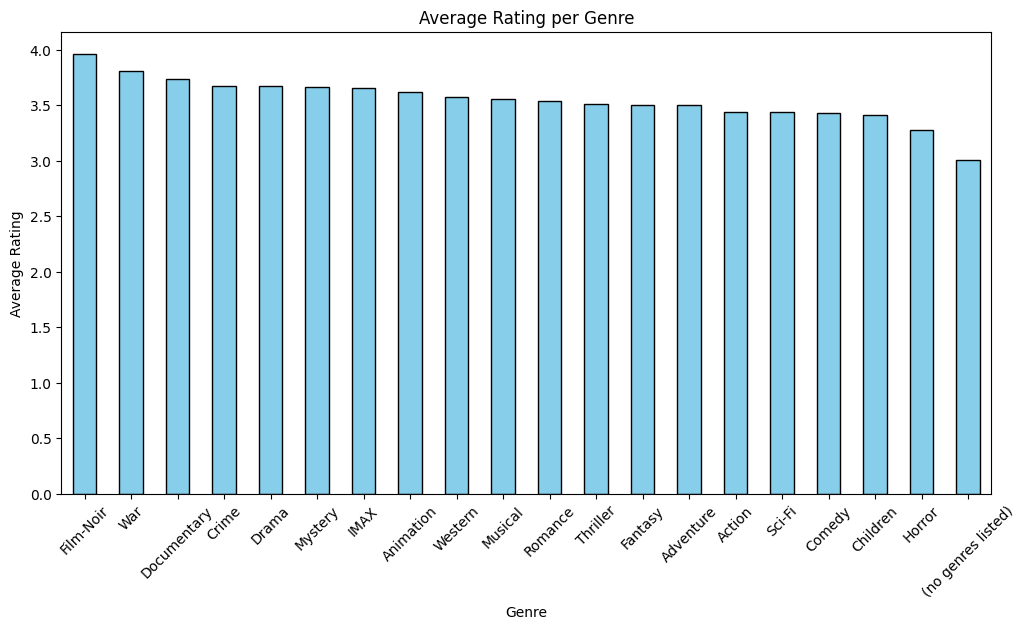

In [12]:
#Extracting genres and their ratings
genres_ratings = ratings_with_movies[['genres', 'rating']].copy()  # Create a copy of the dataset containing only 'genres' and 'rating' columns
genres_ratings['genres'] = genres_ratings['genres'].str.split('|')  #Split the genres column into individual genres
genres_exploded = genres_ratings.explode('genres')  #Expand each genre into its own row

#Calculating the average rating for each genre
average_rating_per_genre = genres_exploded.groupby('genres')['rating'].mean().sort_values(ascending=False)

#Displaying the average ratings for each genre
print("\nAverage Rating per Genre:")
print(average_rating_per_genre)

#Visualizing the average rating per genre
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  
average_rating_per_genre.plot(kind='bar', color='skyblue', edgecolor='black')  
plt.title("Average Rating per Genre") 
plt.xlabel("Genre")  
plt.ylabel("Average Rating")  
plt.xticks(rotation=45)  
plt.show()


Users with the highest number of ratings:
userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
74142     5447
34576     5356
131904    5330
83090     5169
59477     4988
Name: rating, dtype: int64


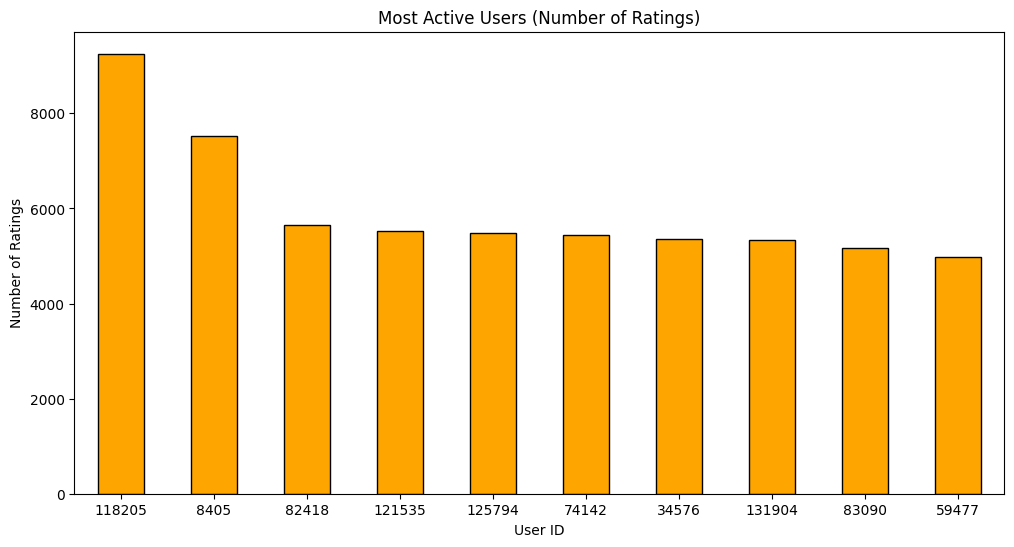

In [13]:
#Calculating the number of ratings per user
ratings_per_user = ratings_with_movies.groupby('userId')['rating'].count().sort_values(ascending=False)
print("\nUsers with the highest number of ratings:")
print(ratings_per_user.head(10))  #Display the top 10 most active users

#Visualizing the top 10 most active users
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  
ratings_per_user.head(10).plot(kind='bar', color='orange', edgecolor='black')  #Create a bar plot for the top 10 users
plt.title("Most Active Users (Number of Ratings)")  
plt.xlabel("User ID")  
plt.ylabel("Number of Ratings")  
plt.xticks(rotation=0)  
plt.show()


Top-rated movies based on average ratings:
                                               average_rating  rating_count
title                                                                      
Shawshank Redemption, The (1994)                     4.446990         63366
Godfather, The (1972)                                4.364732         41355
Usual Suspects, The (1995)                           4.334372         47006
Schindler's List (1993)                              4.310175         50054
Godfather: Part II, The (1974)                       4.275641         27398
Seven Samurai (Shichinin no samurai) (1954)          4.274180         11611
Rear Window (1954)                                   4.271334         17449
Band of Brothers (2001)                              4.263182          4305
Casablanca (1942)                                    4.258327         24349
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)        4.256935          6525

Lowest-rated movies based on average rating

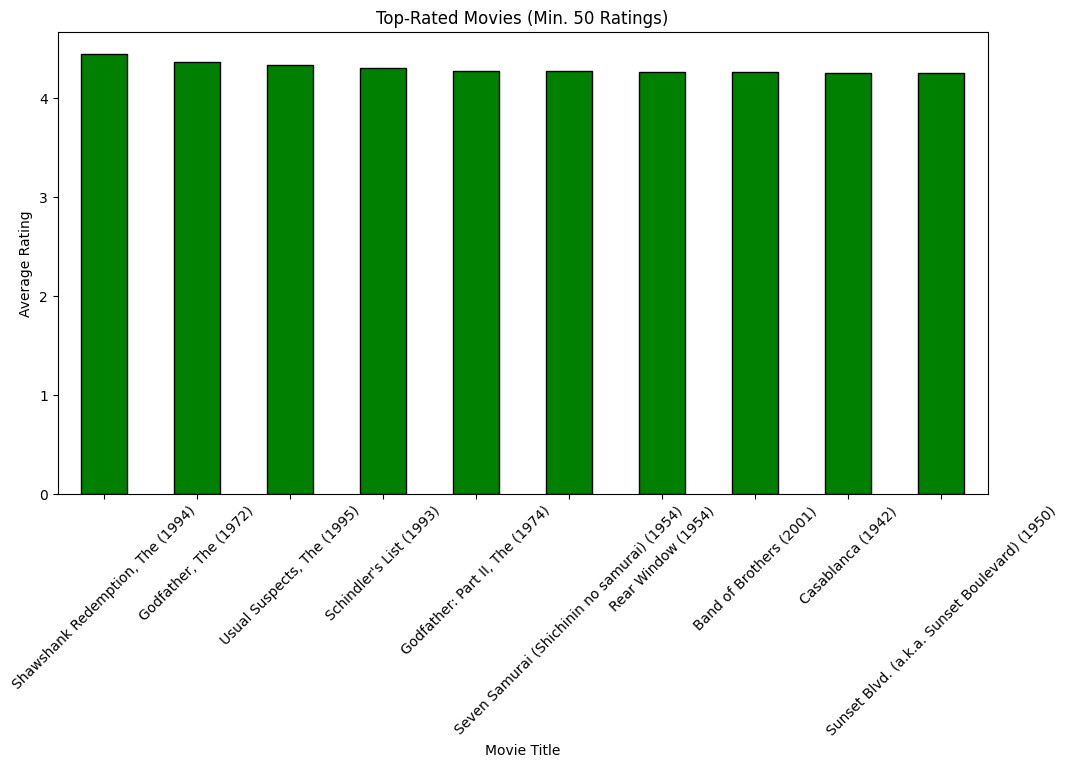

In [16]:
#Calculate statistics for each movie: average rating and rating count
movies_stats = ratings_with_movies.groupby('title').agg(
    average_rating=('rating', 'mean'),  #Calculate the average rating for each movie
    rating_count=('rating', 'count'))  #Count the total number of ratings for each movie


#Filter movies with at least 50 ratings
popular_movies_stats = movies_stats[movies_stats['rating_count'] >= 50]

#Find the top 10 movies with the highest average ratings
top_rated_movies = popular_movies_stats.sort_values(by='average_rating', ascending=False).head(10)
print("\nTop-rated movies based on average ratings:")
print(top_rated_movies)

#Find the 10 movies with the lowest average ratings
lowest_rated_movies = popular_movies_stats.sort_values(by='average_rating').head(10)
print("\nLowest-rated movies based on average ratings:")
print(lowest_rated_movies)

#Visualize the top 10 movies with the highest average ratings
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  
top_rated_movies['average_rating'].plot(kind='bar', color='green', edgecolor='black')  #Create a bar plot
plt.title("Top-Rated Movies (Min. 50 Ratings)")  
plt.xlabel("Movie Title")  
plt.ylabel("Average Rating")  
plt.xticks(rotation=45)  
plt.show()


Number of ratings per year:
timestamp
1995          4
1996    1612609
1997     700982
1998     308070
1999    1198384
2000    1953659
2001    1186125
2002     869719
2003    1035878
2004    1170049
2005    1803158
2006    1171836
2007    1053430
2008    1158777
2009     930036
2010     903691
2011     766366
2012     731389
2013     599327
2014     562888
2015     283886
Name: count, dtype: int64


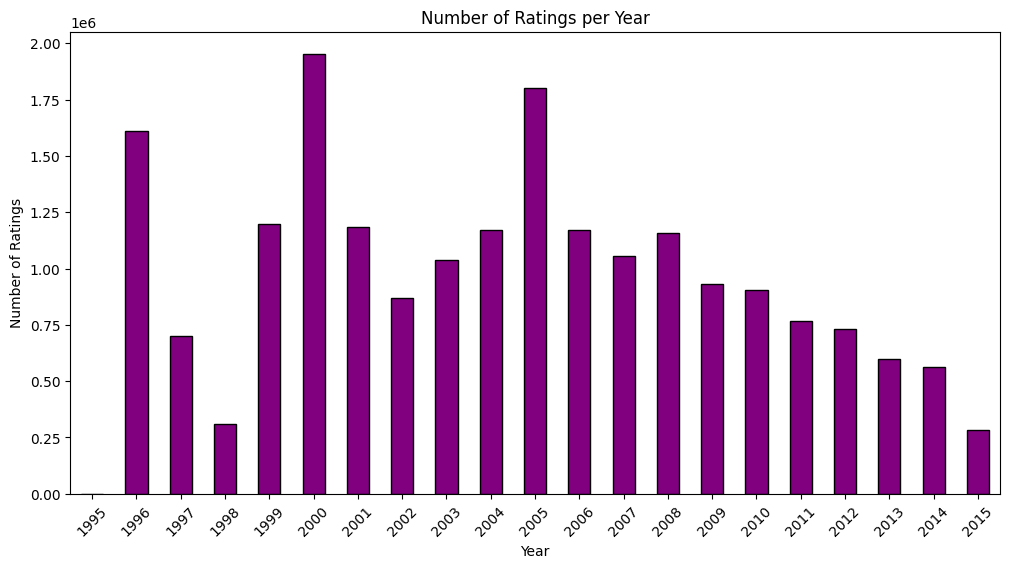


Average rating per year:
timestamp
1995    3.750000
1996    3.545408
1997    3.588522
1998    3.512484
1999    3.616337
2000    3.576119
2001    3.533771
2002    3.482654
2003    3.474775
2004    3.429614
2005    3.434001
2006    3.463172
2007    3.471741
2008    3.539019
2009    3.508644
2010    3.533408
2011    3.562192
2012    3.609827
2013    3.644767
2014    3.607711
2015    3.499819
Name: rating, dtype: float64


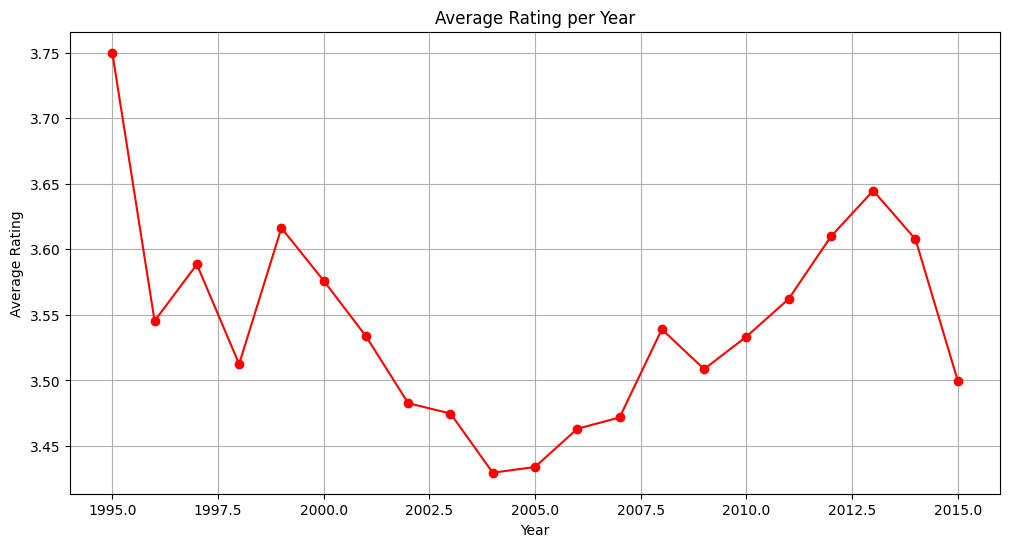

In [18]:
#Convert the 'timestamp' column to a datetime format
ratings_with_movies['timestamp'] = pd.to_datetime(ratings_with_movies['timestamp'])

#Count the number of ratings per year
ratings_per_year = ratings_with_movies['timestamp'].dt.year.value_counts().sort_index()
print("\nNumber of ratings per year:")
print(ratings_per_year)

#Plot the number of ratings per year as a bar chart
plt.figure(figsize=(12, 6))  
ratings_per_year.plot(kind='bar', color='purple', edgecolor='black')  #Create a bar chart
plt.title("Number of Ratings per Year")  
plt.xlabel("Year")  
plt.ylabel("Number of Ratings")  
plt.xticks(rotation=45)  
plt.show()  

#Calculate the average rating per year
average_rating_per_year = ratings_with_movies.groupby(ratings_with_movies['timestamp'].dt.year)['rating'].mean()
print("\nAverage rating per year:")
print(average_rating_per_year)

#Plot the average rating per year as a line chart
plt.figure(figsize=(12, 6))  
average_rating_per_year.plot(kind='line', marker='o', color='red')  #Create a line chart with markers
plt.title("Average Rating per Year")  
plt.xlabel("Year")  
plt.ylabel("Average Rating")  
plt.grid()  
plt.show()  

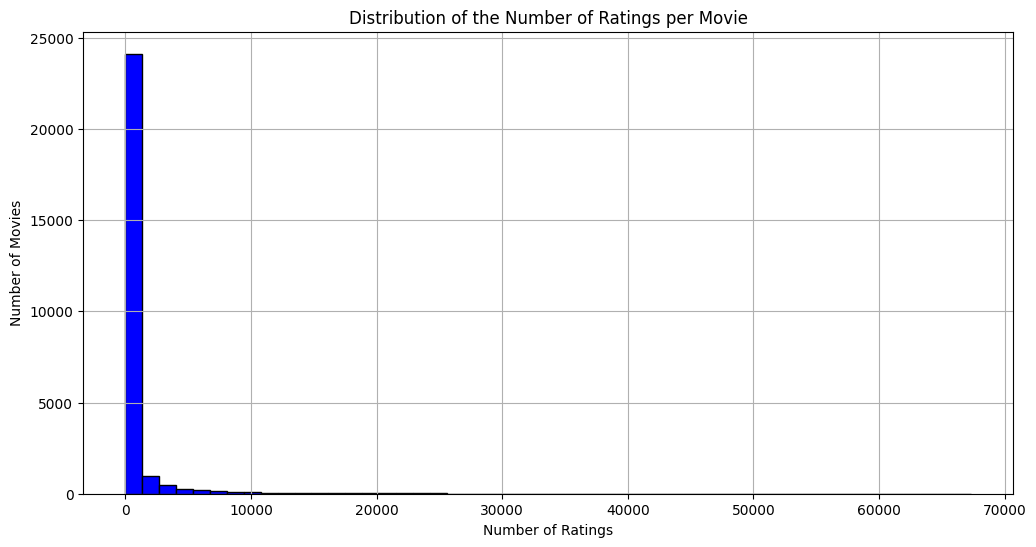

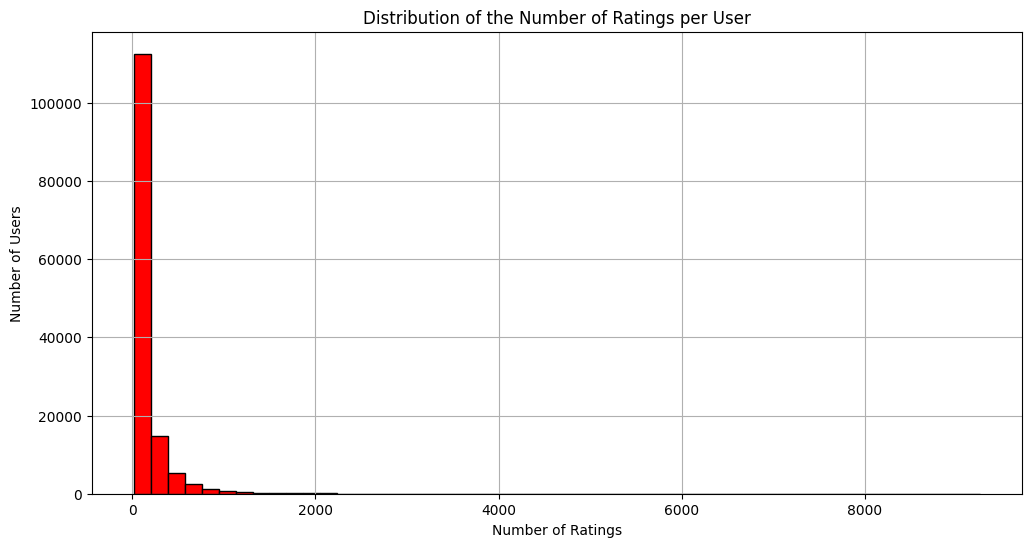

In [19]:
#Plot the distribution of the number of ratings per movie
plt.figure(figsize=(12, 6))  
ratings_per_movie.hist(bins=50, color='blue', edgecolor='black')  #Create a histogram for the number of ratings per movie
plt.title("Distribution of the Number of Ratings per Movie")  
plt.xlabel("Number of Ratings")  
plt.ylabel("Number of Movies")  
plt.show()  

#Plot the distribution of the number of ratings per user
plt.figure(figsize=(12, 6))  
ratings_per_user.hist(bins=50, color='red', edgecolor='black')  #Create a histogram for the number of ratings per user
plt.title("Distribution of the Number of Ratings per User")  
plt.xlabel("Number of Ratings")  
plt.ylabel("Number of Users")  
plt.show()  

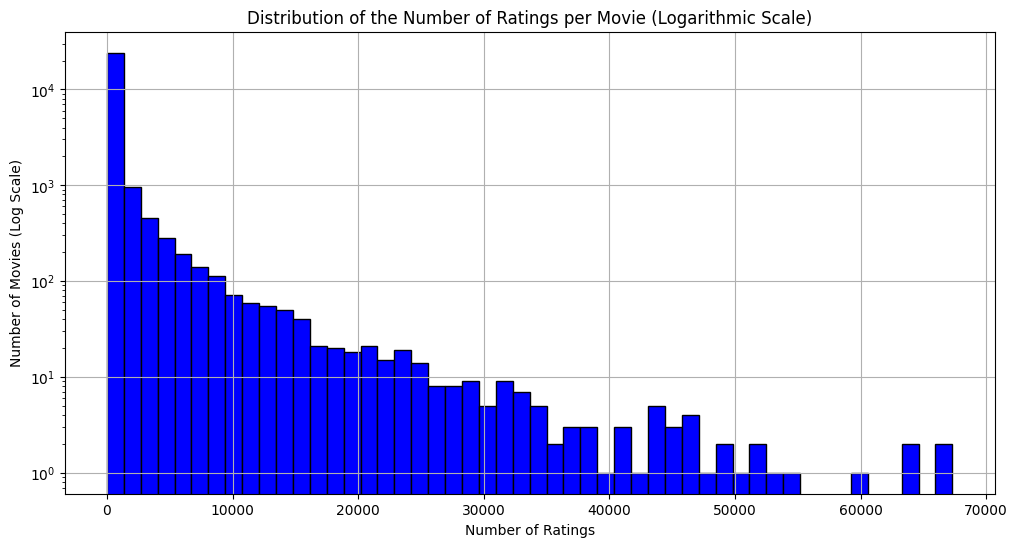

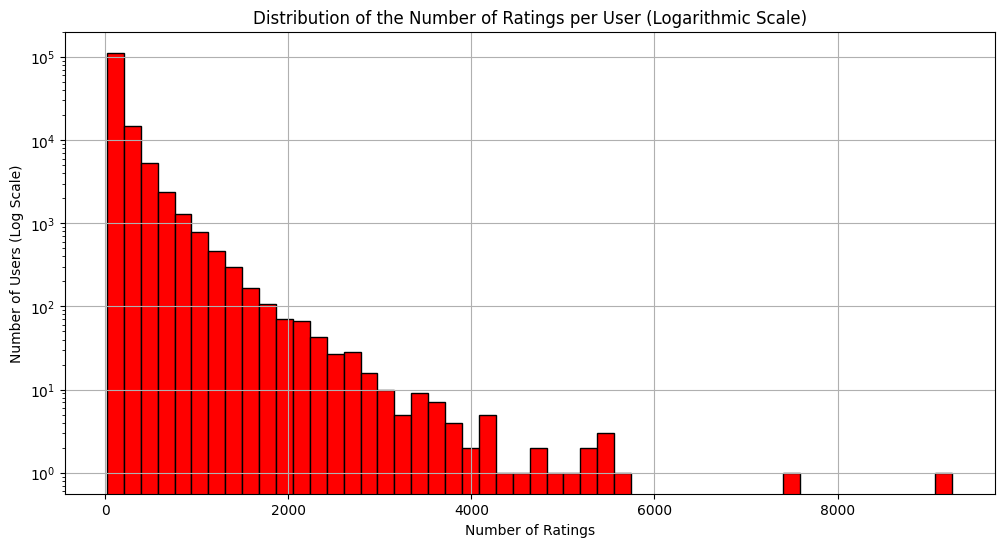

In [21]:
#Plotting the distribution of the number of ratings per movie with logarithmic scale
plt.figure(figsize=(12, 6))  
ratings_per_movie.hist(bins=50, color='blue', edgecolor='black', log=True)  #Add log scale to the y-axis
plt.title("Distribution of the Number of Ratings per Movie (Logarithmic Scale)")  
plt.xlabel("Number of Ratings")  
plt.ylabel("Number of Movies (Log Scale)")  
plt.show()  

#Plotting the distribution of the number of ratings per user with logarithmic scale
plt.figure(figsize=(12, 6))  
ratings_per_user.hist(bins=50, color='red', edgecolor='black', log=True)  #Add log scale to the y-axis
plt.title("Distribution of the Number of Ratings per User (Logarithmic Scale)") 
plt.xlabel("Number of Ratings")  
plt.ylabel("Number of Users (Log Scale)") 
plt.show() 